In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns

In [2]:
def format_func(value,tick_number):
    return int(value)

In [3]:
# load rankings data here:
wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')


In [4]:
# write function to plot rankings over time for 1 roller coaster here:
def rankings_v_time(coaster_name,ranker,park_name):
    coaster_info = ranker[(ranker.Name == coaster_name) & (ranker.Park == park_name)]
    
    years = coaster_info['Year of Rank']
    rankings = coaster_info.Rank
    
    fig,ax = plt.subplots(figsize = (8,6))
    ax = plt.subplot(111)
    
    plt.plot(years,rankings,marker='*',color = 'red',markersize = 8,linewidth = 1)
    
    ax.set_title('Rankings vs. Time of ' + coaster_name + ' at ' + park_name, fontsize = 14,fontweight = 'bold')
    ax.set_xlabel('Year',fontsize = 14,fontweight = 'bold')
    ax.set_ylabel('Ranking',fontsize = 14,fontweight = 'bold')
    
    ax.invert_yaxis()
    ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
    
    plt.show()  
    
    plt.clf()

In [5]:
def two_coasters(coaster_1,park_1,coaster_2,park_2,ranker_df):
    c1_info = ranker_df[(ranker_df.Name == coaster_1) & (ranker_df.Park == park_1)]
    c2_info = ranker_df[(ranker_df.Name == coaster_2) & (ranker_df.Park == park_2)]
    
    c1_years = c1_info['Year of Rank']
    c1_ranks = c1_info.Rank
    
    c2_years = c2_info['Year of Rank']
    c2_ranks = c2_info.Rank
    
    print(type(c2_ranks))
    
    fig,ax = plt.subplots(figsize = (8,6))
    ax = plt.subplot(111)
    
    plt.plot(c1_years,c1_ranks,marker='*',color = 'red',markersize = 8,linewidth = 1,label = coaster_1)
    plt.plot(c2_years,c2_ranks,marker = '>',color = 'blue',markersize = 8,linewidth = 1,label = coaster_2)
    
    ax.set_title('Rankings vs. Time', fontsize = 14,fontweight = 'bold')
    ax.set_xlabel('Year',fontsize = 14,fontweight = 'bold')
    ax.set_ylabel('Ranking',fontsize = 14,fontweight = 'bold')
    
    ax.set_yticks(range(min(c1_ranks.append(c2_ranks)),max(c1_ranks.append(c2_ranks))+1))
    
    ax.invert_yaxis()
    #ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
    
    plt.legend()
    plt.show()  
    
    plt.clf()

In [6]:
def top_n_coasters(n, ranker_df):
    '''tracks all coasters in the top n of ranker_df'''
    
    top_n_df = ranker_df[ranker_df.Rank <= n]
    
    fig, ax = plt.subplots(figsize = (16,6))
    
    ranks = []
    for coaster in set(top_n_df['Name']):
        coaster_rankings = top_n_df[top_n_df['Name'] ==coaster]
        
        c_years = coaster_rankings["Year of Rank"]
        c_ranks = coaster_rankings.Rank
        
        
        ax.plot(c_years,c_ranks,marker = 'o',label = coaster)
        
    ax.set_title('Rankings of the Top {} Coasters'.format(n))
    ax.set_xlabel('Year')
    ax.set_ylabel('Ranking')
    plt.legend(loc = 0)
    plt.show()
    plt.clf()
    

In [7]:
#two_coasters('El Toro','Six Flags Great Adventure','Boulder Dash','Lake Compounce',wood)

In [8]:
#top_n_coasters(5,wood)

In [9]:
roller_coasters = pd.read_csv('roller_coasters.csv')
print(roller_coasters.head())

            name material_type seating_type  speed  height  length  \
0       Goudurix         Steel     Sit Down   75.0    37.0   950.0   
1  Dream catcher         Steel    Suspended   45.0    25.0   600.0   
2     Alucinakis         Steel     Sit Down   30.0     8.0   250.0   
3       Anaconda        Wooden     Sit Down   85.0    35.0  1200.0   
4         Azteka         Steel     Sit Down   55.0    17.0   500.0   

   num_inversions     manufacturer            park            status  
0             7.0           Vekoma    Parc Asterix  status.operating  
1             0.0           Vekoma   Bobbejaanland  status.operating  
2             0.0         Zamperla    Terra Mítica  status.operating  
3             0.0  William J. Cobb  Walygator Parc  status.operating  
4             0.0           Soquet          Le Pal  status.operating  


In [10]:
def coaster_hist(column_name,bins = 20):
    ok_columns = ['speed','height','length','num_inversions']
    
    if column_name not in ok_columns:
        print('Please enter a valid statistic (speed, height, length, or num_inversions)')
        return
    
    attr = roller_coasters[column_name]
    
    plt.hist(attr,bins=bins)
    
    plt.title(column_name.capitalize() + ' of Roller Coasters')
    plt.xlabel(column_name.capitalize())
    plt.ylabel('Counts')
    
    plt.show()
    plt.clf()

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


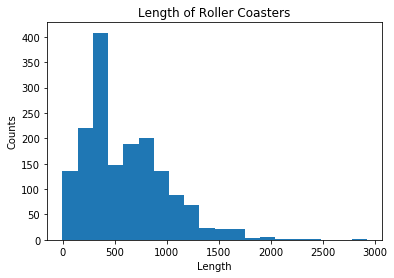

In [11]:
coaster_hist('length')

In [31]:
def park_bar(park_name,df = roller_coasters):
    park_coasters = df[df.park == park_name]
    
    names = park_coasters.name
    inversions = park_coasters.num_inversions
    
    ax = plt.subplot(111)
    plt.bar(names,inversions,color = 'pink')
    
    plt.title('Number of inversions on Coasters at '+ park_name,fontsize = 14, fontweight ='bold')
    plt.xlabel('Coaster',fontsize = 12,fontweight = 'bold')
    plt.ylabel('Number of Inversions',fontsize = 12,fontweight = 'bold')
    
    plt.xticks(rotation = 90)
    plt.yticks(fontsize = 12)
    
    plt.show()
    plt.clf()

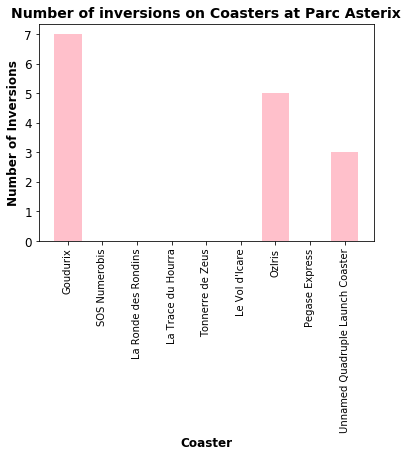

In [32]:
park_bar('Parc Asterix')

In [84]:
def pie_of_status(df = roller_coasters):
    try:
        closed = roller_coasters[roller_coasters.status == 'status.closed.definitely']
        operating = roller_coasters[roller_coasters.status == 'status.operating']
    except KeyError:
        print('This dataframe does not have operation status as a column.')
        return
    
    #print(closed.head(),operating.head())
    
    num_closed = len(closed.drop_duplicates())
    num_open = len(operating.drop_duplicates())
    
    explode = [0,.2]
    plt.pie([num_closed,num_open],autopct = '%.1f%%',colors = ['red','limegreen'],pctdistance = 1.2,
            explode = explode,shadow = True,startangle =20)
    
    plt.axis('equal')
    
    plt.title('Operational Status of Coasters',fontsize = 18,fontweight = 'bold')
    
    
    plt.legend(['Closed','Open'],fontsize = 14,loc = 'best')
    
    plt.show()
    plt.clf()

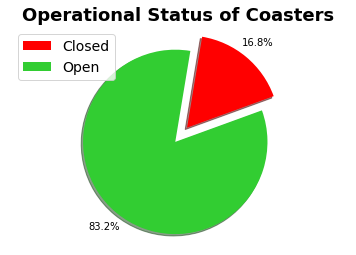

<Figure size 432x288 with 0 Axes>

In [85]:
pie_of_status()

In [107]:
def scatter_attrs(attr_1,attr_2,df = roller_coasters):
    ok_columns = ['speed','height','length','num_inversions']
    
    if (attr_1 not in ok_columns) | (attr_2 not in ok_columns):
        print('Please enter a valid statistic (speed, height, length, or num_inversions)')
        return
    
    else:
        
        sns.set_context('notebook',font_scale = 1.5)
        sns.set_style('darkgrid')
        
        x_attr = df[attr_1] #attribute 1 is the x axis
        y_attr = df[attr_2] # attribute 2 is the y axis
        
        fig,ax = plt.subplots(figsize = (16,9))

        
        plt.scatter(x_attr,y_attr,color = 'crimson')
        
        ax.set_title(attr_1.capitalize() + ' vs. ' + attr_2.capitalize())
        ax.set_xlabel(attr_1)
        ax.set_ylabel(attr_2)
        
        plt.show()
        
        plt.clf()

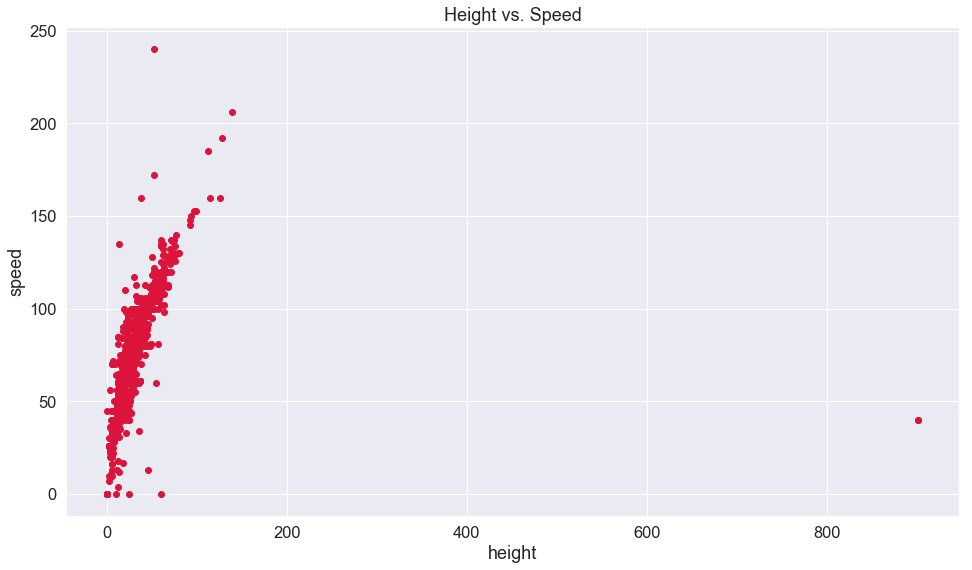

<Figure size 432x288 with 0 Axes>

In [108]:
scatter_attrs('height','speed')